In [1]:
import random
import numpy as np
import pandas as pd

%matplotlib inline

## Euclidean Distance

### Advantages
- Implementation is easy and parameter-free.
- In terms of complexity, it outperforms the Dynamic Time Waping (DTW).

### Disadvantages
- Timeseries signals must have the same length.
- Sensitive to noise.
- It cannot handle local time-shifiting

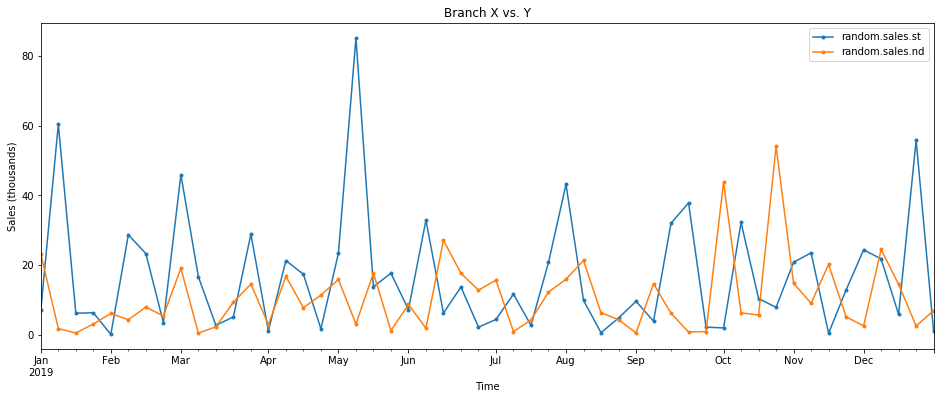

In [2]:
# TS 01
dates = pd.date_range(start="2019-01-01", end="2019-12-31", freq="W")
values =  np.random.exponential(scale=20, size=len(dates))
rsales_st = pd.DataFrame(values, index=dates, columns=["random.sales.st"])

# TS 02
dates = pd.date_range(start="2019-01-01", end="2019-12-31", freq="W")
values =  np.random.exponential(scale=10, size=len(dates))
rsales_nd = pd.DataFrame(values, index=dates, columns=["random.sales.nd"])

ax1 = rsales_st.plot(marker='.', figsize=(16,6))
ax2 = rsales_nd.plot(marker='.', ax=ax1)

ax1.set_ylabel("Sales (thousands)")
ax1.set_xlabel("Time")
ax1.set_title("Branch X vs. Y");

In [3]:
rsales = rsales_st.join(rsales_nd)
rsales.head(5)

,random.sales.st,random.sales.nd
2019-01-06,7.099477,23.143436
2019-01-13,60.444800,1.741219
2019-01-20,6.154420,0.457722
2019-01-27,6.278127,3.041040
2019-02-03,0.067793,6.082753


Euclidean distance is defined as follows $D(T;S) = \displaystyle\sum^1_{i=1}{(T_i - S_i)^2}$

In [4]:
def compute_sim_euclidean_distance(signal_one, signal_two):
    distance = 0
    for so, st in zip(signal_one, signal_two):
        distance += (so - st)**2
    return round(distance,2)
    
distance = compute_sim_euclidean_distance(signal_one=rsales["random.sales.st"].values, 
                                          signal_two=rsales["random.sales.nd"].values)

print(f"Euclidean distance between two TS is {distance}")

Euclidean distance between two TS is 26892.62


## Dynamic Time warping (DTW)

### Advantages
- Non-linear mapping.
- Not fixed length.

### Disadvantages
- Pratical for small dataset (~3k data-points).
- Time and space complexity.

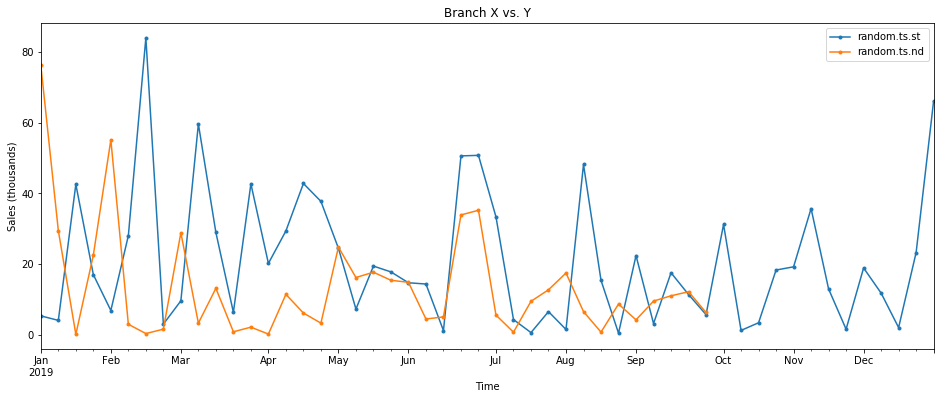

In [185]:
# TS 03
dates = pd.date_range(start="2019-01-01", end="2019-12-31", freq="W")
values =  np.random.exponential(scale=20, size=len(dates))
rts_st = pd.DataFrame(values, index=dates, columns=["random.ts.st"])

# TS 03
dates = pd.date_range(start="2019-01-01", end="2019-09-30", freq="W")
values =  np.random.exponential(scale=10, size=len(dates))
rts_nd = pd.DataFrame(values, index=dates, columns=["random.ts.nd"])

ax1 = rts_st.plot(marker='.', figsize=(16,6))
ax2 = rts_nd.plot(marker='.', ax=ax1)

ax1.set_ylabel("Sales (thousands)")
ax1.set_xlabel("Time")
ax1.set_title("Branch X vs. Y");

In [193]:
def compute_dtw_distance(signal_one, signal_two, window):
    
    m, n = len(signal_one), len(signal_two)
    
    # Window Constraint
    win = np.max([window, abs(n-m)])
    
    distance = np.zeros(shape=(m+1,n+1))
    for i in range(m+1):
        for j in range(n+1):
            distance[i,j] = np.inf
            
    distance[0, 0] = 0
    
    for i in range(1, m+1):
        for j in range(np.max([1, i-win]), np.min([n, i+win])+1):
            distance[i, j] = 0
    
    for i in range(1, m+1):
        for j in range(np.max([1, i-win]), np.min([n, i+win])+1):
            dist = abs(signal_one[i-1] - signal_two[j-1])
            dist_min = np.min([distance[i-1, j], distance[i, j-1], distance[i-1, j-1]])
            distance[i,j] = dist + dist_min
    
    return round(distance[-1,-1], 2)
    
distance_dtw = compute_dtw_distance(signal_one=rts_st["random.ts.st"], 
                                    signal_two=rts_nd["random.ts.nd"], 
                                    window=5)



print(f"DTW distance between two TS is {distance_dtw}")

DTW distance between two TS is 603.38


---